In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

### Import the file processed file

In [37]:
twitter_df = pd.read_csv('../data/processed/twitter-kaggle-sentiment-cleaned.csv')

### Sentiment analysis using VADER

In [38]:
tqdm.pandas()

In [39]:
analyzer = SentimentIntensityAnalyzer()

In [40]:
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

In [41]:
twitter_df['cleaned_text'].isnull().sum()


np.int64(215)

In [42]:
twitter_df = twitter_df.dropna(subset=['cleaned_text'])

In [43]:
twitter_df['vader_compound'] = twitter_df['cleaned_text'].progress_apply(analyze_sentiment)

100%|██████████| 49785/49785 [00:01<00:00, 27961.85it/s]


In [44]:
twitter_df.head()

,target,id,date,flag,user,text,cleaned_text,sentiment,vader_compound
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok,negative,0.6249
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr,negative,0.3182
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lamehey next time u hang kim...,negative,-0.0772
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,school email wont open geographi stuff revis s...,negative,-0.5267
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airway problem,negative,-0.4019


In [45]:
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [46]:
twitter_df['vader_sentiment'] = twitter_df['vader_compound'].apply(get_sentiment_label)

In [47]:
vader_df = twitter_df

In [48]:
twitter_df['vader_sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [49]:
twitter_df.head()

,target,id,date,flag,user,text,cleaned_text,sentiment,vader_compound,vader_sentiment
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok,negative,0.6249,positive
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr,negative,0.3182,positive
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lamehey next time u hang kim...,negative,-0.0772,negative
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,school email wont open geographi stuff revis s...,negative,-0.5267,negative
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airway problem,negative,-0.4019,negative


<Axes: title={'center': 'VADER Sentiment Distribution'}, xlabel='vader_sentiment'>

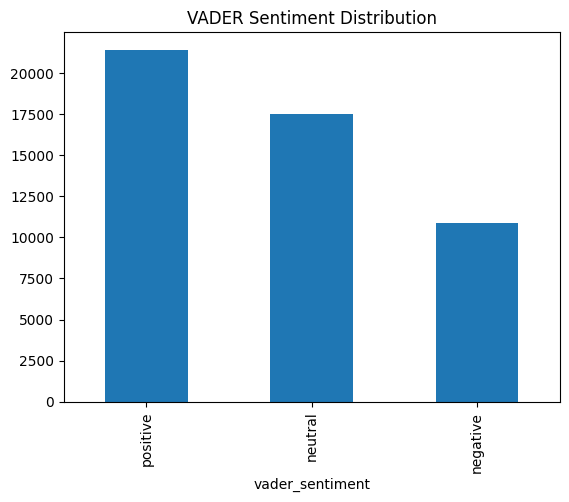

In [50]:
twitter_df['vader_sentiment'].value_counts().plot(kind='bar', title='VADER Sentiment Distribution')


### Sentiment analysis using textBLOB

In [51]:
from textblob import TextBlob

In [52]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [53]:
twitter_df['textblob_polarity'] = twitter_df['cleaned_text'].progress_apply(textblob_sentiment)

100%|██████████| 49785/49785 [00:05<00:00, 9595.00it/s] 


In [54]:
def get_textblob_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [55]:
twitter_df['textblob_sentiment'] = twitter_df['textblob_polarity'].apply(get_textblob_sentiment_label)

In [56]:
twitter_df[['text','cleaned_text','sentiment', 'vader_sentiment', 'textblob_sentiment']].head(10)


,text,cleaned_text,sentiment,vader_sentiment,textblob_sentiment
0,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok,negative,positive,positive
1,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr,negative,positive,positive
2,@TiannaChaos i know just family drama. its la...,know famili drama lamehey next time u hang kim...,negative,negative,negative
3,School email won't open and I have geography ...,school email wont open geographi stuff revis s...,negative,negative,negative
4,upper airways problem,upper airway problem,negative,negative,neutral
5,Going to miss Pastor's sermon on Faith...,go miss pastor sermon faith,negative,positive,negative
6,on lunch....dj should come eat with me,lunchdj come eat,positive,neutral,neutral
7,@piginthepoke oh why are you feeling like that?,oh feel like,negative,positive,neutral
8,gahh noo!peyton needs to live!this is horrible,gahh noopeyton need livethi horribl,negative,neutral,neutral
9,@mrstessyman thank you glad you like it! There...,thank glad like product review bit site enjoy ...,positive,positive,positive


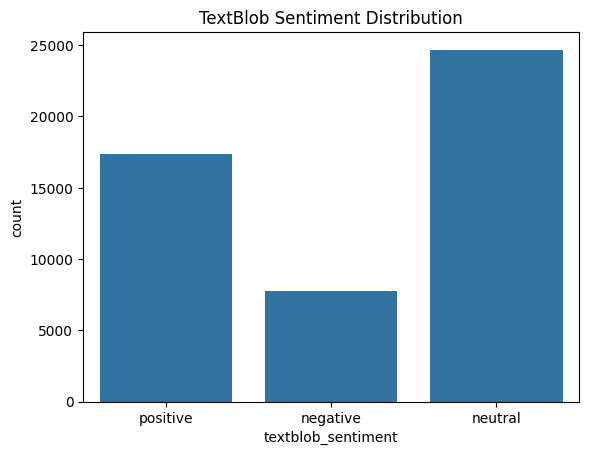

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=twitter_df, x='textblob_sentiment')
plt.title("TextBlob Sentiment Distribution")
plt.show()


### Compare both Vader vs textblob

In [58]:
twitter_df[['sentiment', 'vader_sentiment', 'textblob_sentiment']].head(20)


,sentiment,vader_sentiment,textblob_sentiment
0,negative,positive,positive
1,negative,positive,positive
2,negative,negative,negative
3,negative,negative,negative
4,negative,negative,neutral
5,negative,positive,negative
6,positive,neutral,neutral
7,negative,positive,neutral
8,negative,neutral,neutral
9,positive,positive,positive


In [59]:
twitter_df['vader_vs_textblob'] = twitter_df['vader_sentiment'] == twitter_df['textblob_sentiment']
twitter_df['vader_vs_textblob'].value_counts()


vader_vs_textblob
True     32340
False    17445
Name: count, dtype: int64

In [60]:
twitter_df['vader_vs_original'] = twitter_df['vader_sentiment'] == twitter_df['sentiment']
twitter_df['vader_vs_original'].value_counts()


vader_vs_original
False    27729
True     22056
Name: count, dtype: int64

In [61]:
twitter_df['textblob_vs_original'] = twitter_df['textblob_sentiment'] == twitter_df['sentiment']
twitter_df['textblob_vs_original'].value_counts()


textblob_vs_original
False    33048
True     16737
Name: count, dtype: int64

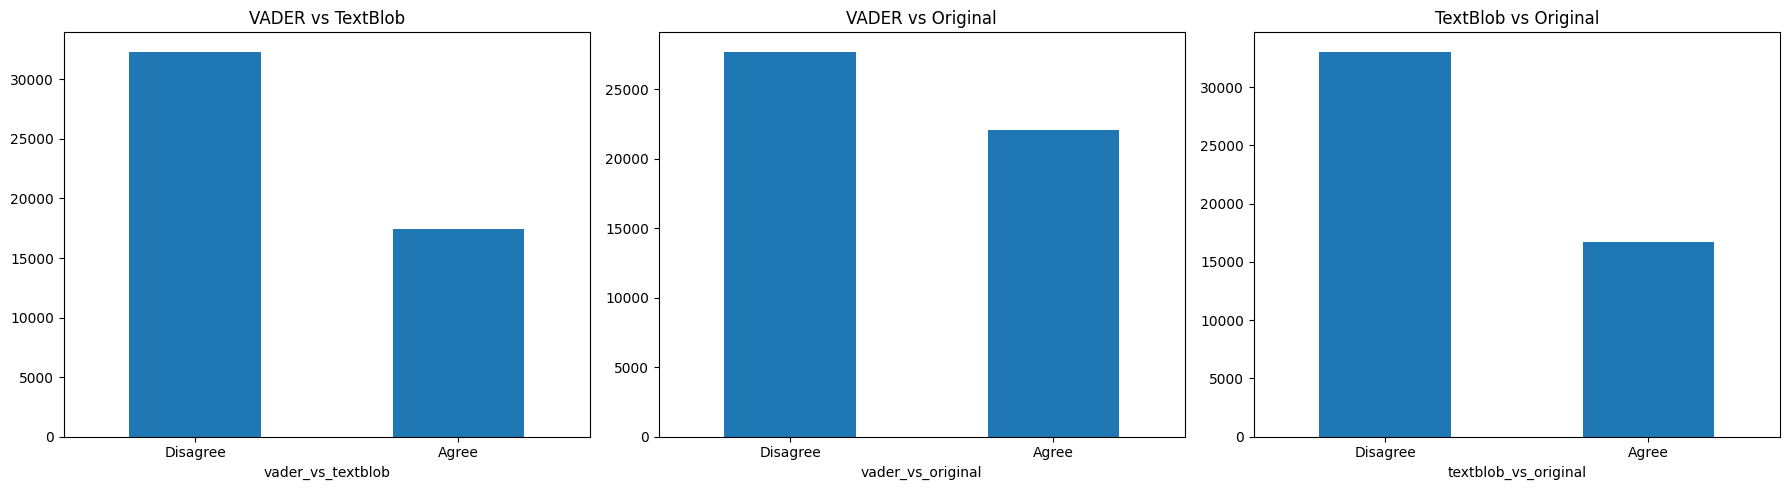

In [62]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# VADER vs TextBlob
twitter_df['vader_vs_textblob'].value_counts().plot(kind='bar', ax=axs[0], title='VADER vs TextBlob')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Disagree', 'Agree'], rotation=0)

# VADER vs Original
twitter_df['vader_vs_original'].value_counts().plot(kind='bar', ax=axs[1], title='VADER vs Original')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Disagree', 'Agree'], rotation=0)

# TextBlob vs Original
twitter_df['textblob_vs_original'].value_counts().plot(kind='bar', ax=axs[2], title='TextBlob vs Original')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Disagree', 'Agree'], rotation=0)

# Adjust spacing
plt.tight_layout()
plt.show()


In [63]:
vader_accuracy = twitter_df['vader_vs_original'].mean() * 100
textblob_accuracy = twitter_df['textblob_vs_original'].mean() * 100

print(f"VADER Sentiment Match with Original: {vader_accuracy:.2f}%")
print(f"TextBlob Sentiment Match with Original: {textblob_accuracy:.2f}%")


VADER Sentiment Match with Original: 44.30%
TextBlob Sentiment Match with Original: 33.62%


In [64]:
vader_df.to_csv('../data/processed/twitter-kaggle-sentiment-vader.csv', index=False)